In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import NMF;
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/M.Tech/Projects/Effective\ Feature\ Extraction/ Dataset/

[Errno 2] No such file or directory: 'drive/MyDrive/M.Tech/Projects/Effective Feature Extraction/ Dataset/'
/content


In [ ]:
data = pd.read_csv('network-intrusion-detection-MIL/Train_data.csv')
#data

In [ ]:
#data.columns

In [ ]:
data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [ ]:
#data.isna().sum()

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


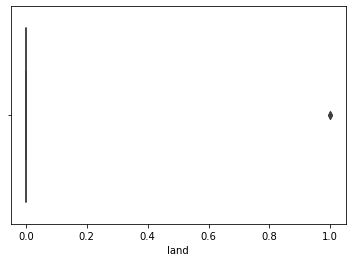

In [ ]:
sns.boxplot(data.land)

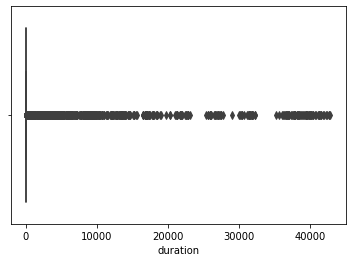

In [ ]:
sns.boxplot(data.duration)

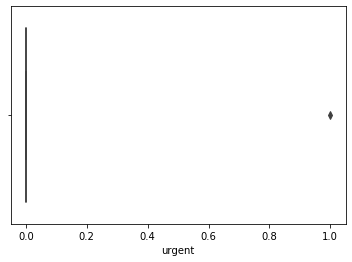

In [ ]:
sns.boxplot(data.urgent)

In [ ]:
data.loc[data.land > 0].shape[0]

2

In [ ]:
data = data.drop(columns=['land'], axis=1).copy()
data = data.drop(columns=['urgent'], axis=1).copy()
data.shape

(25192, 40)

In [ ]:
#X.columns#data.head()

In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
data['protocol_type']= label_encoder.fit_transform(data['protocol_type']) 
data['service']= label_encoder.fit_transform(data['service']) 
data['flag']= label_encoder.fit_transform(data['flag']) 
data['class']= label_encoder.fit_transform(data['class']) 

y=data['class']
X = data.drop(['class','is_host_login','num_outbound_cmds'], axis = 1)


X = pd.get_dummies(X, prefix_sep='_')
#X = StandardScaler().fit_transform(X)


In [ ]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(X)
#tfidf.toarray()

In [ ]:
X.shape

(25192, 37)

In [ ]:
#obtain a NMF model.
model = NMF(n_components=36, init='nndsvd');
NMfc = model.fit(X,y).transform(X)

model1 = NMF(n_components=33, init='nndsvd');
NMfc1 = model1.fit(NMfc,y).transform(NMfc)

model2 = NMF(n_components=30, init='nndsvd');
NMfc2 = model2.fit(NMfc1,y).transform(NMfc1)

model3 = NMF(n_components=27, init='nndsvd');
NMfc3 = model3.fit(NMfc2,y).transform(NMfc2)

In [ ]:
print(NMfc2.shape)

(25192, 30)


In [ ]:
#Univariate features Selection 

#apply SelectKBest class to extract top 25 best features
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(NMfc3,y)
features = fit.transform(NMfc3)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
X_uni=featureScores.nlargest(25,'Score')
print(featureScores.nlargest(25,'Score'))  #print 25 best features

              Features      Score
3                 flag  98.782769
18               count  45.026435
7                  hot  33.818158
16    num_access_files  33.804918
20         serror_rate  14.925776
22         rerror_rate  11.383199
23     srv_rerror_rate   9.942772
13            num_root   8.944900
21     srv_serror_rate   8.849334
15          num_shells   8.527156
8    num_failed_logins   7.313096
2              service   7.184070
12        su_attempted   7.120048
5            dst_bytes   6.655961
6       wrong_fragment   4.348060
14  num_file_creations   3.898174
26  srv_diff_host_rate   3.745873
10     num_compromised   1.987415
11          root_shell   1.927017
0             duration   1.784306
4            src_bytes   1.539071
19           srv_count   1.532581
1        protocol_type   1.339861
25       diff_srv_rate   1.308686
9            logged_in   0.561876


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Univariate Feature selection')

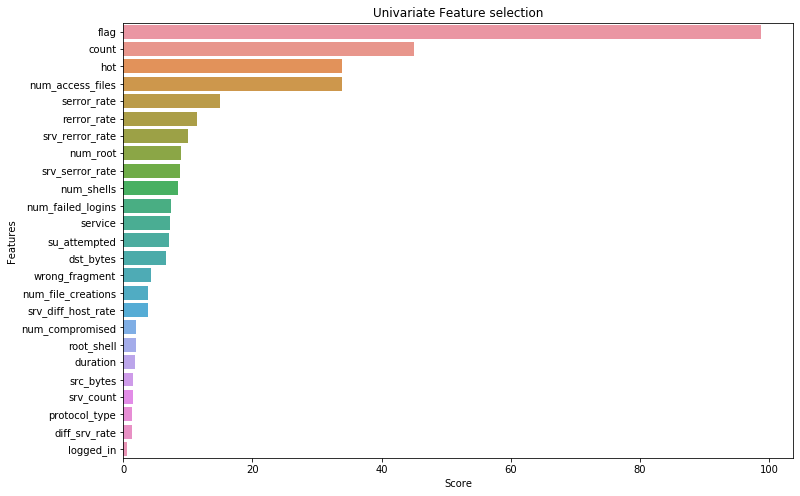

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(X_uni['Score'],X_uni['Features'])
plt.title('Univariate Feature selection')

In [ ]:
P=X[['duration','protocol_type','srv_count','num_access_files','dst_bytes','srv_serror_rate','is_guest_login','hot','src_bytes','su_attempted','wrong_fragment','diff_srv_rate','srv_diff_host_rate','service','num_failed_logins','same_srv_rate','num_root','logged_in','rerror_rate','flag','count','srv_rerror_rate','serror_rate','num_shells','num_compromised']]

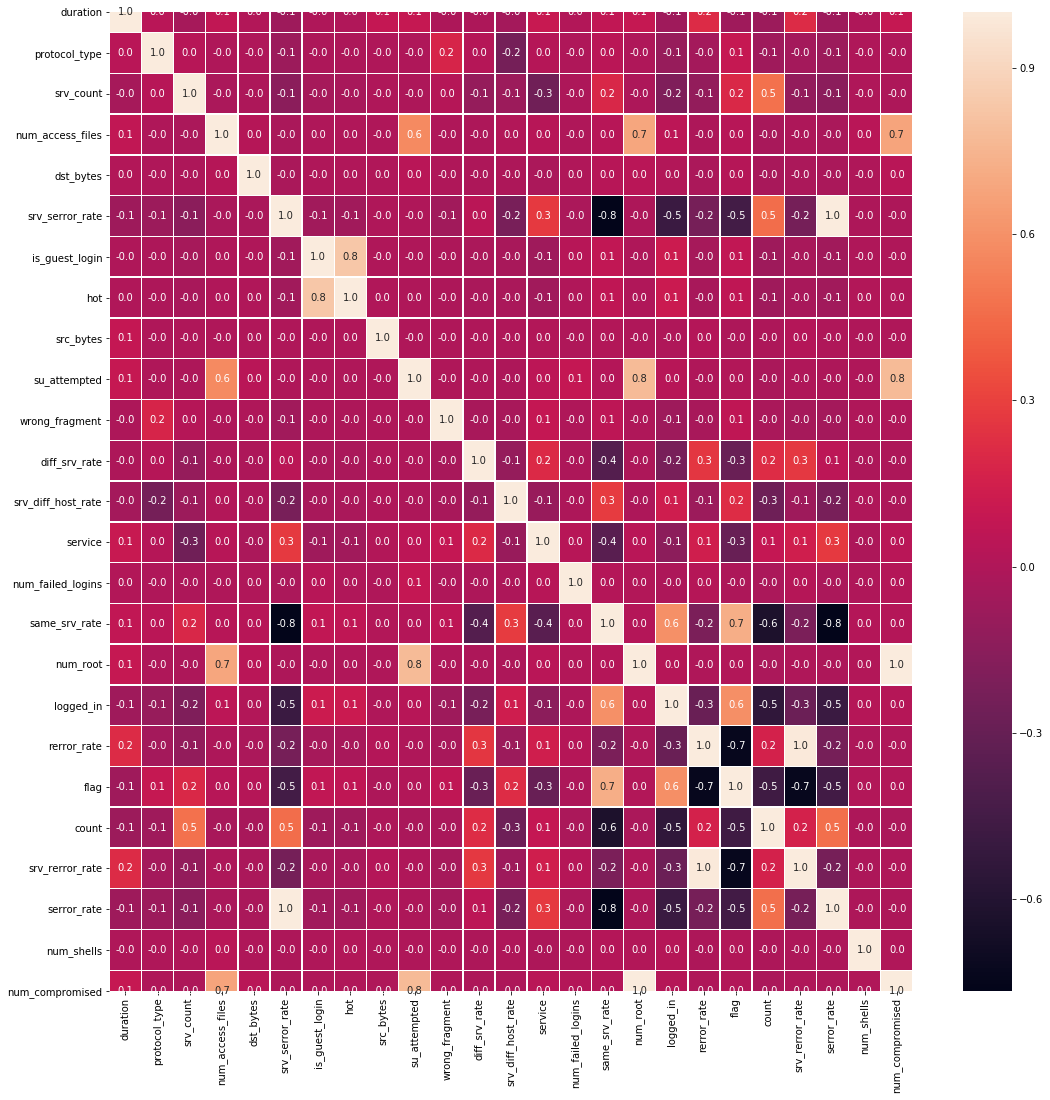

In [ ]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(P.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#range(.shape[1])

In [ ]:
features.shape

(25192, 25)

In [ ]:
# normalize the data attributes
normalized_X = preprocessing.normalize(features)
normalized_Xnmf = preprocessing.normalize(NMfc)

In [ ]:
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(normalized_X,y,test_size=0.20, random_state=42)

#scaler = MaxAbsScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
#Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)

BNB_pred=BNB_Classifier.predict(X_test)
accuracy = accuracy_score(BNB_pred,y_test)
print(BNB_Classifier)
print(classification_report(BNB_pred, y_test, labels=None))
print("BernoulliNB_accuracy = ",accuracy*100)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2257
           1       0.92      0.89      0.91      2782

    accuracy                           0.90      5039
   macro avg       0.90      0.90      0.90      5039
weighted avg       0.90      0.90      0.90      5039

BernoulliNB_accuracy =  89.75987299067275


In [ ]:
# LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

LGR_pred=LGR_Classifier.predict(X_test)
accuracy = accuracy_score(LGR_pred,y_test)
print(LGR_Classifier)
print(classification_report(LGR_pred, y_test, labels=None))
print("LogisticRegression_accuracy = ",accuracy*100)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2238
           1       0.94      0.90      0.92      2801

    accuracy                           0.91      5039
   macro avg       0.91      0.91      0.91      5039
weighted avg       0.91      0.91      0.91      5039

LogisticRegression_accuracy =  90.8513593967057


In [ ]:
#SVM model
from sklearn import svm
svm = svm.SVC()
svm = svm.fit(X_train,y_train)

pred_svm = svm.predict(X_test)
accuracy = accuracy_score(pred_svm, y_test)
print(svm)
print(classification_report(pred_svm, y_test, labels=None))
print("SVM_accuracy = ",accuracy*100)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2255
           1       0.98      0.95      0.96      2784

    accuracy                           0.96      5039
   macro avg       0.96      0.96      0.96      5039
weighted avg       0.96      0.96      0.96      5039

SVM_accuracy =  96.11033935304624


In [ ]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

KNN_pred=KNN_Classifier.predict(X_test)
accuracy = accuracy_score(KNN_pred,y_test)
print(KNN_Classifier)
print(classification_report(KNN_pred, y_test, labels=None))
print("KNN_accuracy = ",accuracy*100)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2369
           1       0.98      0.99      0.99      2670

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039

KNN_accuracy =  98.45207382417146


In [ ]:
#DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(classification_report(pred, y_test, labels=None))
print("DecisionTree_accuracy = ",accuracy*100)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2369
           1       0.99      0.99      0.99      2670

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

DecisionTree_accuracy =  99.16650128993848


In [ ]:
#Random forest
R_clf = RandomForestClassifier(n_estimators= 500)
R_clf.fit(X_train,y_train)

R_pred = R_clf.predict(X_test)
accuracy = accuracy_score(R_pred,y_test)
print(R_clf)
print(classification_report(R_pred, y_test, labels=None))
print("RandomForest_accuracy = ",accuracy*100)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039

RandomForest_accuracy =  99.52371502282199


In [ ]:
#Random forest
R_clf = RandomForestClassifier()
R_clf.fit(X_train,y_train)

R_pred = R_clf.predict(X_test)
accuracy = accuracy_score(R_pred,y_test)
print(R_clf)
print(classification_report(R_pred, y_test, labels=None))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,R_pred)
print(cm)

print("RandomForest_accuracy = ",accuracy*100)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

[[2351   14]
 [  14 2660]]
RandomForest_accuracy =  99.44433419329232


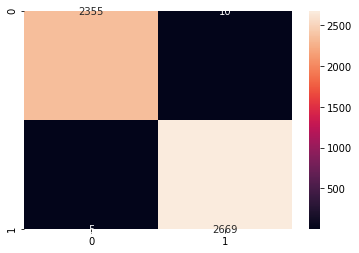

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")